# Drug firing rate figure plots
-----

Plot paired plots for mean firing rate changes pre- and post- stimulation periods. 

The following figures can be found here: 
> 1. Extended data 8n

**load libraries**

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import style

os.chdir('../..')
from fused_org_ephys import (plot_pairs_drugapp, save_fig, save_df)

!pwd

/Users/michael.zabolocki/Desktop/code/fusion_models_ephys


## **Extended data 8n:** Drug quantification
---- 

Paired plots of normalized firing rate changes pre and post- synaptic blocker cocktail applications, with optogenetic stimulations. 

In [2]:
# baseline 
df_DR022 = pd.read_pickle('Data/DR0022.pkl')
df_DR023 = pd.read_pickle('Data/DR0023.pkl')

# drug applications
df_DR022_drugs = pd.read_pickle('Data/DR0022_drugs.pkl')
df_DR023_drugs = pd.read_pickle('Data/DR0023_drugs.pkl')

Next, concenate mean firing rates (per channel) at baseline, optogenetic stimulations, and opto + synaptic blocker applications.

In [3]:
baseline = np.concatenate([df_DR022.mfr_activechans_perchan.values[0], df_DR023.mfr_activechans_perchan.values[0]])
opto = np.concatenate([df_DR022.mfr_opto_activechans_perchan.values[0], df_DR023.mfr_opto_activechans_perchan.values[0]])
drugs_opto = np.concatenate([df_DR022_drugs.mfr_opto_activechans_perchan.values[0], df_DR023_drugs.mfr_opto_activechans_perchan.values[0]])

Set save folder for figure output. 

In [4]:
save_folder = 'figures/supp_figures/'

Plot the paired outputs. 

In [5]:
labels = ['Baseline', 'Stimulation', 'Stimulation\n+ synaptic cocktail']
colors = ['black','royalblue', 'tab:red']

statistic: 161.60588816452446, p-value : 1.9074411811694066e-51
The new directory is created for figures/supp_figures/
saving to: figures/supp_figures/mfr_synapticblockers.pdf
saved


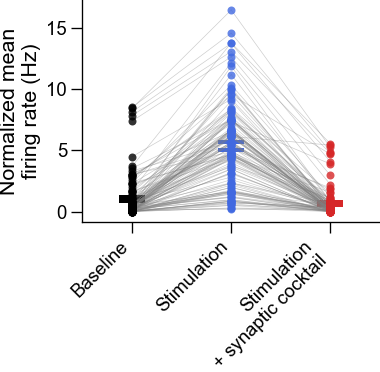

In [6]:
style.use('fused_org_ephys/plots/paper.mplstyle')
fig, ax = plt.subplots(1, 1, figsize = (4,3))

# paired drug plots
# normalized to the mean baseline firing rates
ax, stats = plot_pairs_drugapp(baseline/np.mean(baseline), opto/np.mean(baseline),
                               drugs_opto/np.mean(baseline), labels, colors, ax = ax)

# labels
ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.set_ylabel('Normalized mean\nfiring rate (Hz)')

# save out
save_fig(fig, 'mfr_synapticblockers', file_extension='.pdf', save_folder = save_folder)

Display values used for the figure generation. 

In [7]:
stats_df = pd.DataFrame()

stats_df['normalized_baseline'] = baseline/np.mean(baseline)
stats_df['normalized_stimulation'] = opto/np.mean(baseline)
stats_df['normalized_stimulation_synapticblockers'] = drugs_opto/np.mean(baseline)

display(stats_df)

# save
save_df(stats_df, 'values_drugapplications_perchannel', save_folder=save_folder)

,normalized_baseline,normalized_stimulation,normalized_stimulation_synapticblockers
0,0.363328,3.485084,0.014342
1,0.054977,4.295402,0.057368
2,0.078881,4.388624,0.086051
3,0.000000,0.499577,0.002390
4,0.148200,7.383693,0.064539
...,...,...,...
122,0.353767,5.547929,0.334645
123,0.626263,6.845872,0.497186
124,0.530651,4.740001,0.540212
125,0.779244,5.684177,0.525870


The directory already exists for figures/supp_figures/
saving to: figures/supp_figures/values_drugapplications_perchannel.xlsx
saved
